In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

In [3]:
#Importing csv file into Dataframe object
df = pd.read_csv('used_cars_data.csv')
df.duplicatedcated().sum()

0

In [4]:
#Creating a separate dataframe not to work with the original dataframe
data = df.copy()

In [5]:
#Get column names of the dataframe
data.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [5]:
#Shape of the dataframe
data.shape

(7253, 14)

Dataframe contains 7253 rows and 14 columns

In [6]:
#Getting info about each row of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


There are 7253 rows, however Mileage, Engine,Power, Seats and Price columns has missing values

In [7]:
#Check for duplicate data
data.duplicated().sum()

0

No duplicated values in a dataset.

In [8]:
#Check for null values
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

We have missing values on above 5 columns. Let's find a solution for each!

# Fill-in missing values

## Mileage

In [7]:
#To get the metrics of Mileage representation
data['Mileage'].str[-5:].value_counts()

 kmpl    7177
km/kg      74
Name: Mileage, dtype: int64

We have 2 different types of Mileage units, since they both represent distance covered (in km) per unit of fuel, we only need to strip off the units and can use the values

In [8]:
# Function to replace Mileage Units from the value
def mileage_to_num(mil_val):
    if isinstance(mil_val, str):
        if ('kmpl' in mil_val):
            return float(mil_val.replace("kmpl", ""))
        elif('km/kg' in mil_val):
            return float(mil_val.replace("km/kg", ""))
    else:
        return np.nan

In [9]:
#Calling on function to strip off the units from Mileage column
data['Mileage_Unitless'] = data['Mileage'].apply(mileage_to_num)


#Clean up and drop the original Mileage column
data.drop("Mileage", axis=1, inplace=True)

In [10]:
#Get 5 point info on Mileage_Unitless column
data['Mileage_Unitless'].describe()

count    7251.000000
mean       18.141580
std         4.562197
min         0.000000
25%        15.170000
50%        18.160000
75%        21.100000
max        33.540000
Name: Mileage_Unitless, dtype: float64

Since column's mean and median are very close to each other(very close to normal distribution), we can fill-in the NAN values with mean

In [11]:
data['Mileage_Unitless'] = data['Mileage_Unitless'].fillna(data['Mileage_Unitless'].mean())

Mileage column has been modified to be presented unitless and added as Mileage_Unitless column. Since column's mean and median are very close to each other(very close to normal distribution), we can fill-in the NAN values with mean

## Engine

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
 13  Mileage_Unitless   7253 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 793.4+ KB


In [13]:
#To get the unit of Engine representation
data['Engine'].str[-3:].value_counts()

 CC    7207
Name: Engine, dtype: int64

In [14]:
#Remove Engine Unit by converting a Series into the string and updating it to float datatype
data['Engine_Unitless'] = data['Engine'].str.replace("CC", "").astype(float)

#Clean up and drop the original Engine  column
data.drop("Engine", axis=1, inplace=True)

In [15]:
#Get descriptive statistics of Engine
data['Engine_Unitless'].describe()

count    7207.000000
mean     1616.573470
std       595.285137
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine_Unitless, dtype: float64

In [16]:
#mean > median => setting null values with median
data['Engine_Unitless'].fillna(data['Engine_Unitless'].median(), inplace=True)

Engine column has been modified to be presented unitless and added as Engine_Unitless column. Since column's mean > median, hence column is right skewed, we should fill-in the NAN values with median

## Power 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Power              7078 non-null   object 
 9   Seats              7200 non-null   float64
 10  New_Price          7253 non-null   float64
 11  Price              6019 non-null   float64
 12  Mileage_Unitless   7253 non-null   float64
 13  Engine_Unitless    7253 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB


In [18]:
#Getting the unique Units of the column
data.Power.str[-4:].value_counts()

 bhp    7078
Name: Power, dtype: int64

In [19]:

#Remove Power Unit by converting a Series into the string and updating it to float datatype
data['Power_Unitless'] = data['Power'].str.replace("bhp", "").astype(float)

#Clean up and drop the original Power  column
data.drop("Power", axis=1, inplace=True)

In [20]:
#Get descriptive statistics of Power
data['Power_Unitless'].describe()

count    7078.000000
mean      112.765214
std        53.493553
min        34.200000
25%        75.000000
50%        94.000000
75%       138.100000
max       616.000000
Name: Power_Unitless, dtype: float64

In [21]:
#mean > median => setting null values with median
data['Power_Unitless'].fillna(data['Power_Unitless'].median(), inplace=True)

Power column has been modified to be presented unitless and added as Power_Unitless column. Since column's mean > median, hence data is right skewed, we should fill-in Null values with median

## Seats 

In [22]:
data.Seats.describe()

count    7200.000000
mean        5.279722
std         0.811660
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

In [23]:
#Getting a car model with 0 seats???
data[data['Seats'] == 0]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_Unitless,Engine_Unitless,Power_Unitless
3999,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,0.0,53.14,18.0,10.5,3197.0,94.0


Data error! Looked up the below model on Internet and looks like it's regular cedan model with 5 seats

In [24]:
#Assign value of 5 
data.loc[data['Name'] == 'Audi A4 3.2 FSI Tiptronic Quattro', 'Seats'] = 5
data.loc[data['Name'] == 'Audi A4 3.2 FSI Tiptronic Quattro']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_Unitless,Engine_Unitless,Power_Unitless
3999,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,5.0,53.14,18.0,10.5,3197.0,94.0


In [25]:
data.Seats.describe()

count    7200.000000
mean        5.280417
std         0.809277
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

Now min values looks reasonable => convertable 2 seats!

In [26]:
#Assigning median to null values on Seats column 
data['Seats'].fillna(data.Seats.median(), inplace=True)

. Since Seats column's mean and median are very close to each other(very close to normal distribution), we can fill-in the NAN values with mean

## Price 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Seats              7253 non-null   float64
 9   New_Price          7253 non-null   float64
 10  Price              6019 non-null   float64
 11  Mileage_Unitless   7253 non-null   float64
 12  Engine_Unitless    7253 non-null   float64
 13  Power_Unitless     7253 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [28]:
# Dropping any rows with Null value on Price column 
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Seats              6019 non-null   float64
 9   New_Price          6019 non-null   float64
 10  Price              6019 non-null   float64
 11  Mileage_Unitless   6019 non-null   float64
 12  Engine_Unitless    6019 non-null   float64
 13  Power_Unitless     6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 705.4+ KB


Since Price column is the target variable, we should be removing any rows with Null values on that column, because we don't want to cause a bias results by imputing the target var's values

In [29]:
#Since Serial number is not useful in our model formation, we can drop the column
data.drop("S.No.", axis=1, inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Seats              6019 non-null   float64
 8   New_Price          6019 non-null   float64
 9   Price              6019 non-null   float64
 10  Mileage_Unitless   6019 non-null   float64
 11  Engine_Unitless    6019 non-null   float64
 12  Power_Unitless     6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 658.3+ KB


Now dataset contains 6019 rows and 13 columns

# Exploratory Data Analysis

In [31]:
data.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_Unitless,Engine_Unitless,Power_Unitless
72,Hyundai i10 Sportz 1.2 AT,Kochi,2012,45178,Petrol,Automatic,First,5.0,10.25,3.48,16.95,1197.0,78.9
4857,Hyundai EON Era Plus,Jaipur,2015,54680,Petrol,Manual,First,5.0,10.25,2.50,21.10,814.0,55.2
1529,Tata Zest Quadrajet 1.3 XT,Coimbatore,2018,38310,Diesel,Manual,First,5.0,10.06,6.69,20.65,1248.0,88.7
5625,Tata Tigor XE Diesel,Ahmedabad,2017,16235,Diesel,Manual,First,5.0,7.15,5.50,24.70,1047.0,69.0
882,Hyundai i10 Magna,Jaipur,2010,66770,Petrol,Manual,Second,5.0,10.25,2.60,20.36,1197.0,78.9


No NaN values on a sample data

In [32]:
#Let's do a sanity check on basic summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,6019,1876,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019,NaN,NaN,NaN,2013.36,3.26974,1998,2011,2014,2016,2019
Kilometers_Driven,6019,NaN,NaN,NaN,58738.4,91268.8,171,34000,53000,73000,6.5e+06
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seats,6019,NaN,NaN,NaN,5.27762,0.803479,2,5,5,5,10
New_Price,6019,NaN,NaN,NaN,21.4999,24.3329,3.91,7.88,11.3,21.77,375
Price,6019,NaN,NaN,NaN,9.47947,11.1879,0.44,3.5,5.64,9.95,160


Observation:
* The oldest car => 1998y.o. and the newest is 2019 with median concentrated on 2014. Based on statistical numbers year is close to be normally distributed, but still has a slight negative skew
* Kilometers_Driven is widely ranged based on min and max values. Looks like data is pozitively/right skewed.
* Seats is close to look like normally distributed as well but with a small right skew, ranging between 2 to 10 seats.
* Price for the New cars are rightly skewed with mean > median
* Price for the Used cars are rightly skewed with mean > median. FYI, since both prices are in INR Lakhs, there is no necessity to convert them to any other unit.
* Mileage is very close to normal distribution shape
* Engine is right skewed with mean > median
* Power is right skewed with mean > median
* Mumbai is the city with the most sales of cars
* Diesel is the most popular fuel_type within the cars
* Cars with the First Owner type is the most popular one

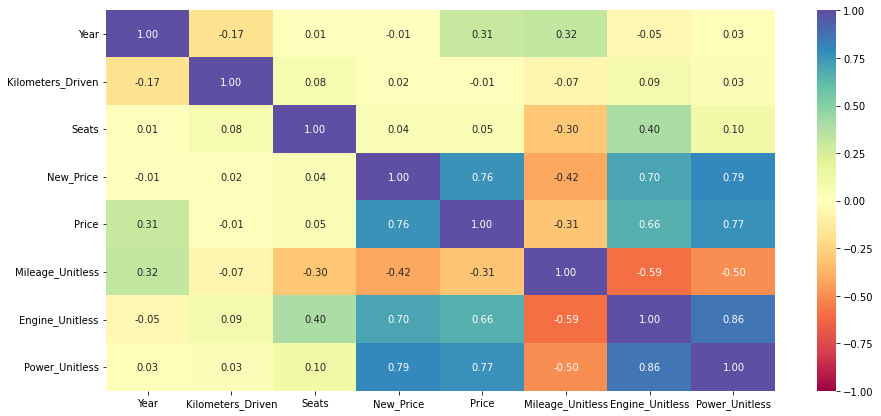

In [33]:
#Visualize correlation
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral', fmt='.2f');
plt.show()

There is an observation on positive correlation between:
* Positive corr between price and New_Price(which makes sense as they those columns are interrelated)
* Price/Price_new and Engine volume size
* Price/Price_New and Power engine size
* Engine and Power

There is an observation on negative correlation between:
* Mileage and Engine
* Mileage and Power

In [34]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

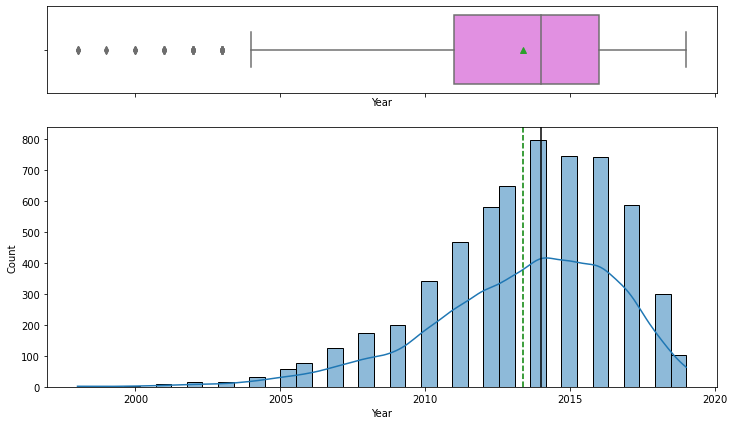

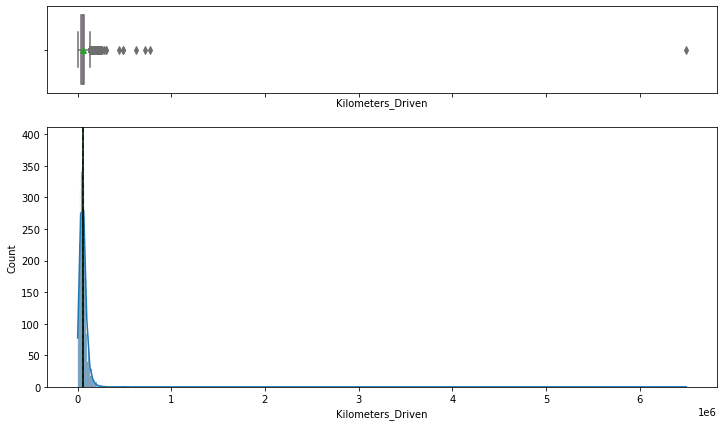

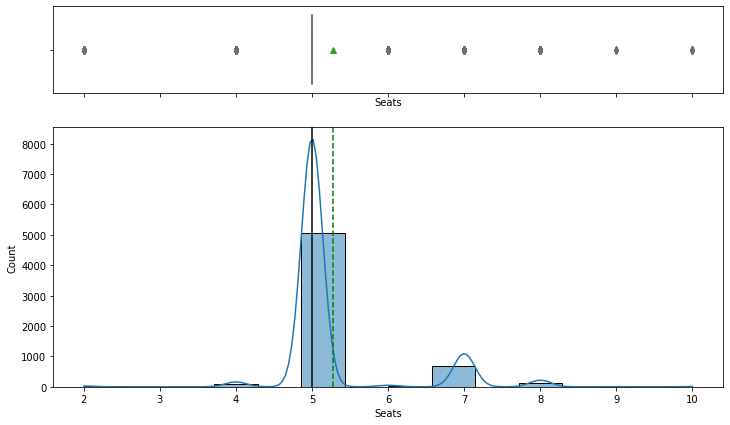

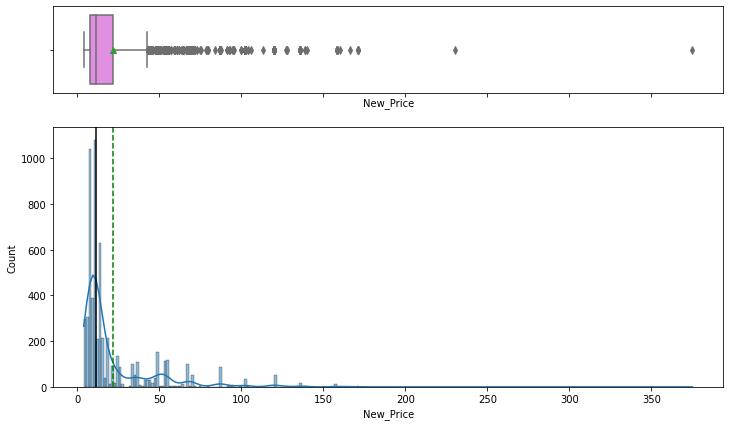

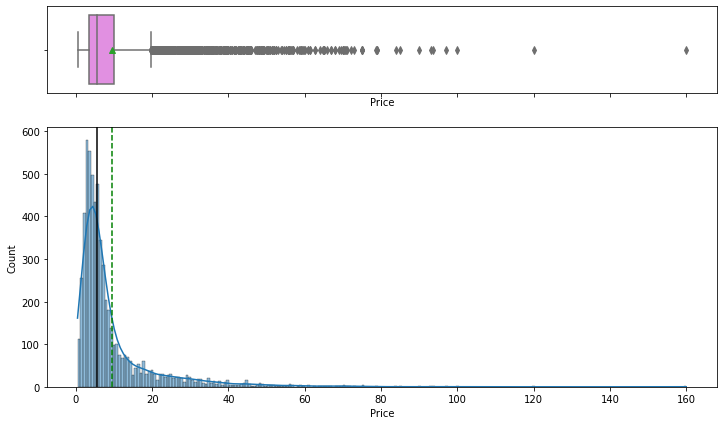

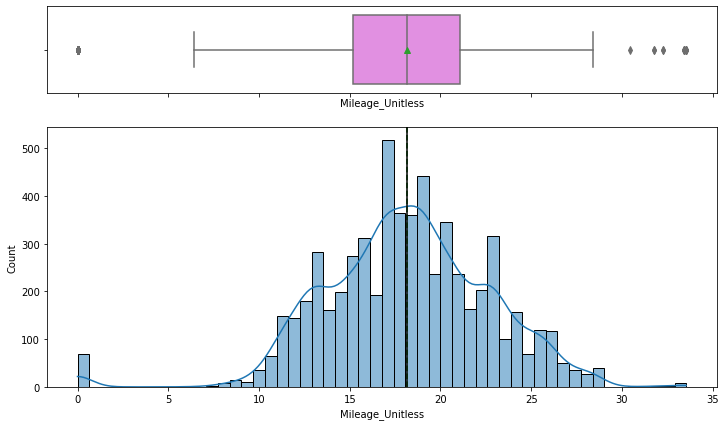

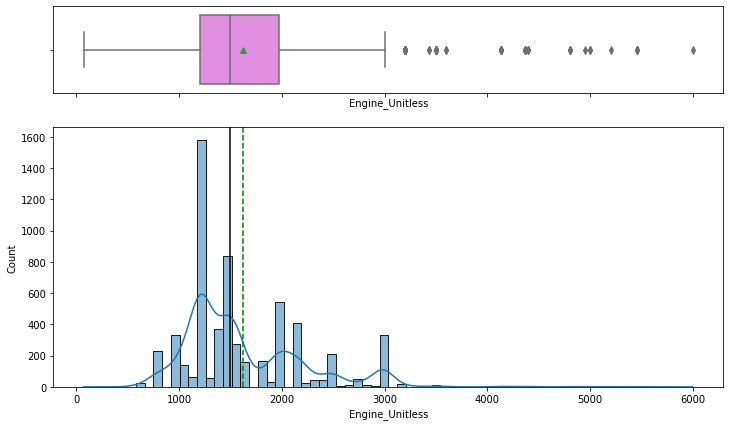

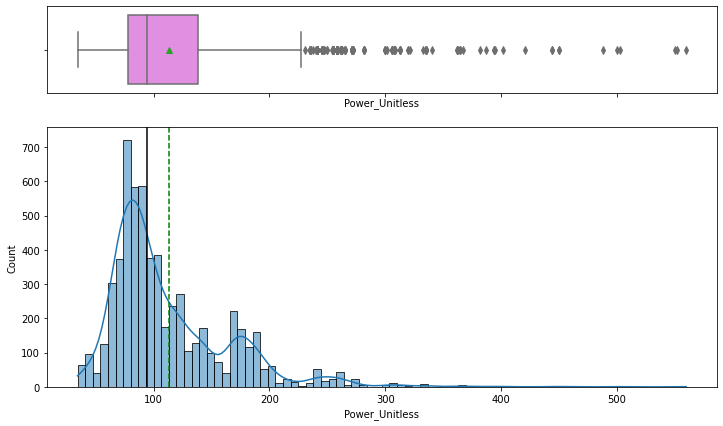

In [35]:
for col in data.columns:
    if (data[col].dtype != object):
        histogram_boxplot(data, col, kde=True)

* Year is negatively skewed
* Kilometers_Driven, New_Price, Price, Engine, Power are positively skewed
* New_Price values ranges more than 350 INR Lakh, while Price ranges up to 160 INR Lakh
* Seats and Mileage have an almost normal distribution shape
* Each variable contains Outliers above the whiskers

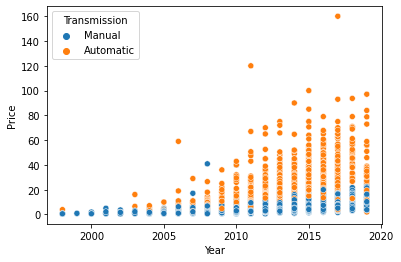

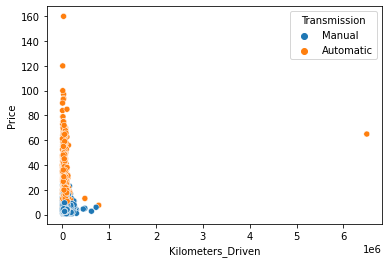

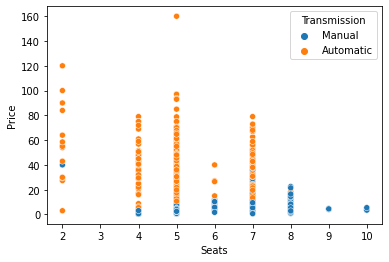

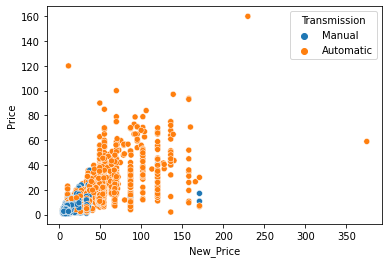

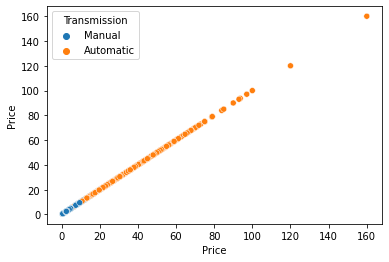

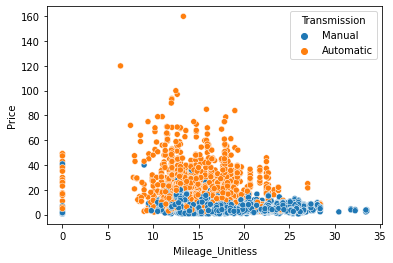

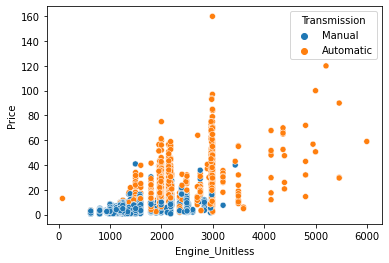

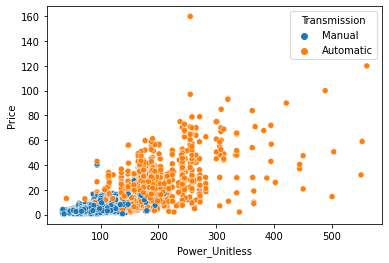

In [36]:
#Scatterplot for columns against Price
for col in data.columns:
    if (data[col].dtype != object):
        sns.scatterplot(data=data, x=col, y='Price', hue='Transmission')
        plt.show()

Observations:
* The price is higher for a newer and Automatic transmissioned cars, while Manual Transmission car's price is pretty stable
* Less the Kilometers_Driven in a car =>  higher the price especially for Automatic cars
* There is a wide range of seats for cars with Manual transmission, especially there is a choice for seats > 7
* Automatic cars has larger engine volumes and higher power, hence higher price than on Manual Transmission

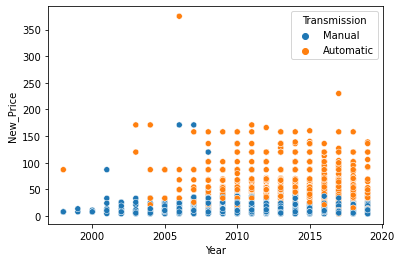

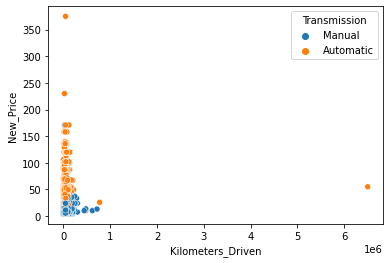

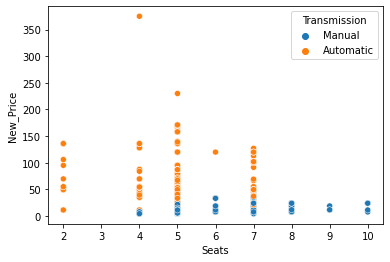

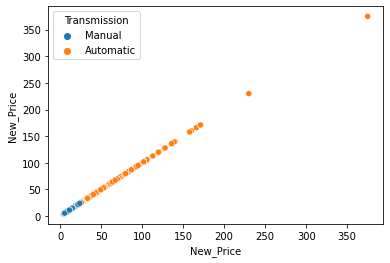

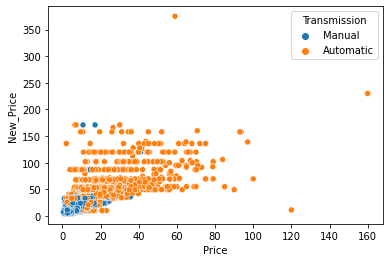

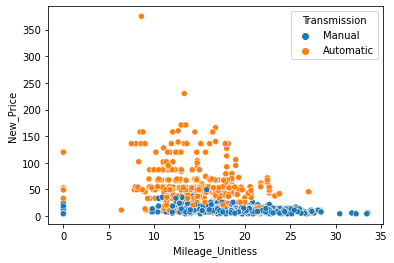

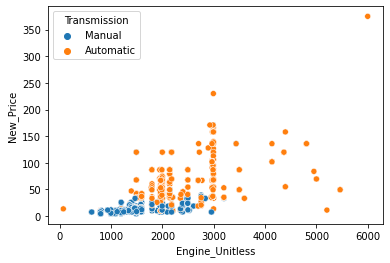

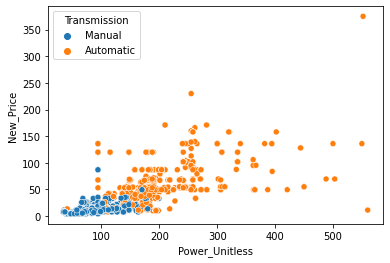

In [37]:
#Scatterplot for columns against New_Price
for col in data.columns:
    if (data[col].dtype != object):
        sns.scatterplot(data=data, x=col, y='New_Price', hue='Transmission')
        plt.show()

Observations:
* The price for a newer and Automatic transmissioned cars is higher than for Manual Transmission cars
* Less the Kilometers_Driven in a car =>  higher the price especially for Automatic cars
* There is a wide range of seats for cars with Manual transmission, especially there is a choice for seats > 7
* Automatic cars has larger engine volumes and higher power, hence higher price than on Manual Transmission

Price and New_Price values have the same correlation with other variables, but different in the range of values.

<Figure size 936x504 with 0 Axes>

<Figure size 936x504 with 0 Axes>

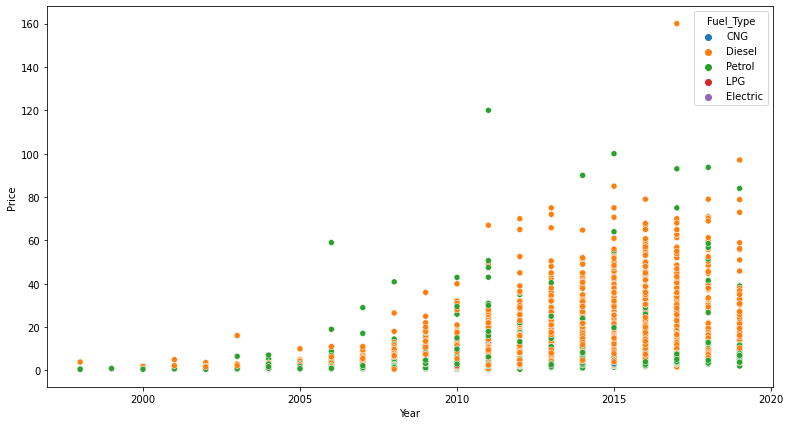

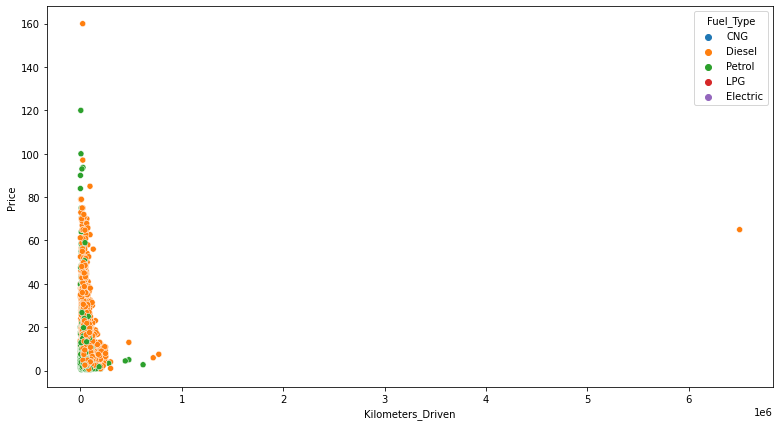

<Figure size 936x504 with 0 Axes>

<Figure size 936x504 with 0 Axes>

<Figure size 936x504 with 0 Axes>

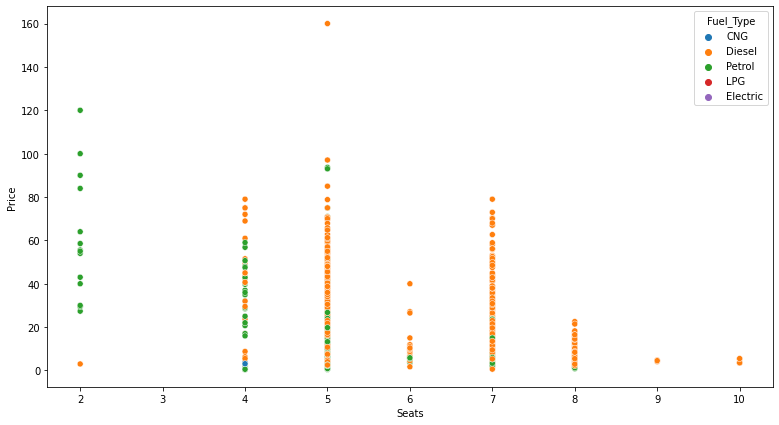

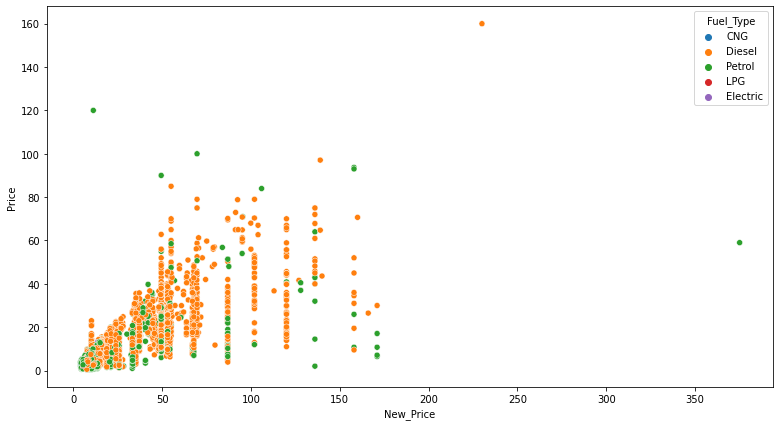

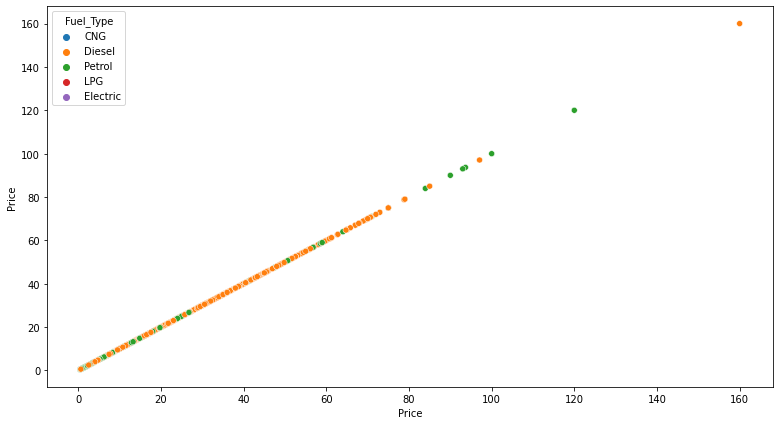

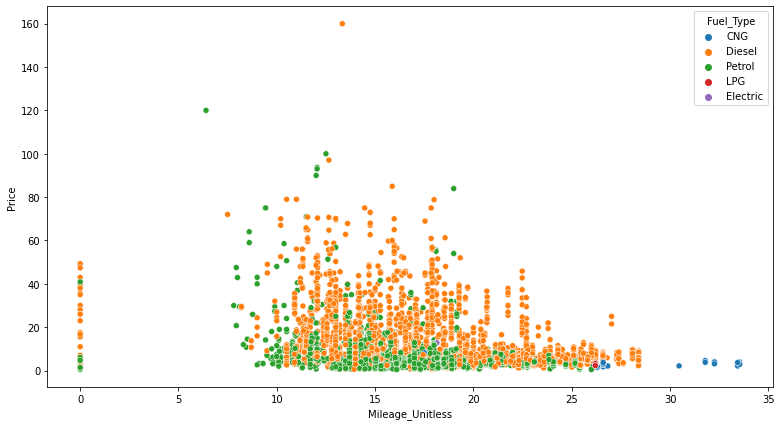

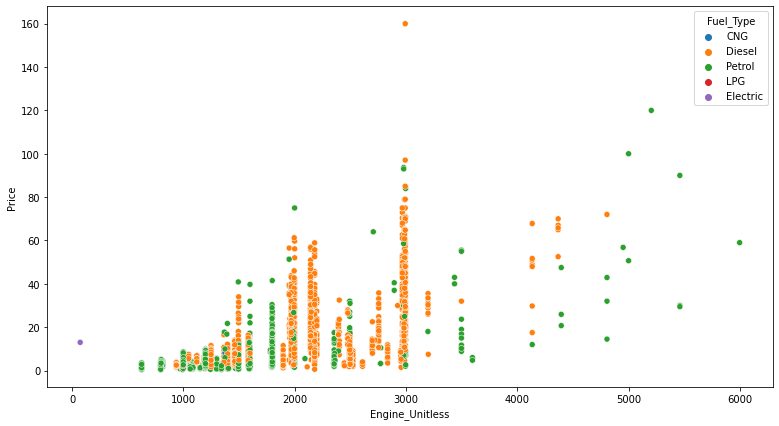

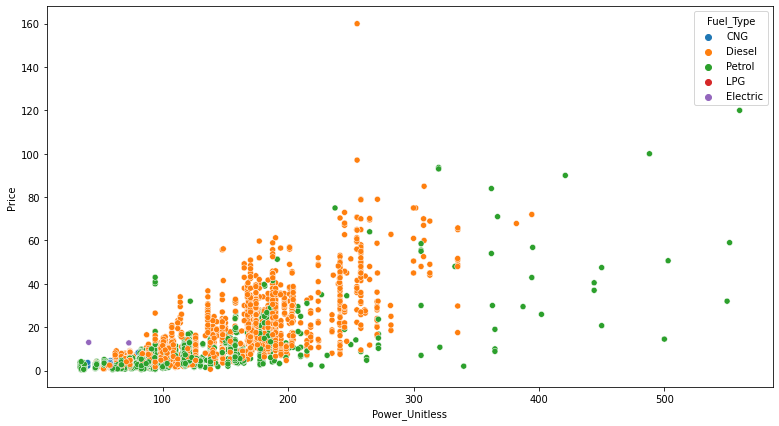

In [38]:
for col in data.columns:
    plt.figure(figsize=(13, 7));
    if (data[col].dtype != object):
        sns.scatterplot(data=data, x=col, y='Price', hue='Fuel_Type');
        plt.show();

* Diesel Fuel_Type cars are the majority, followed by Petrol. Bigger the engine/power, higher the price.
* LPG and CNG Fuel_Types are with the highest Mileage offer of values > 25, but not affecting the price.
* Electric cars have a very small engine, and hence power. However they are higher in price in comparison with other fuel_Type cars with same smaller values.

In [39]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [40]:
#Groupping data by Location to get the biggest number of available cars
data.groupby("Location").Name.count().sort_values(ascending=False)

Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Name, dtype: int64

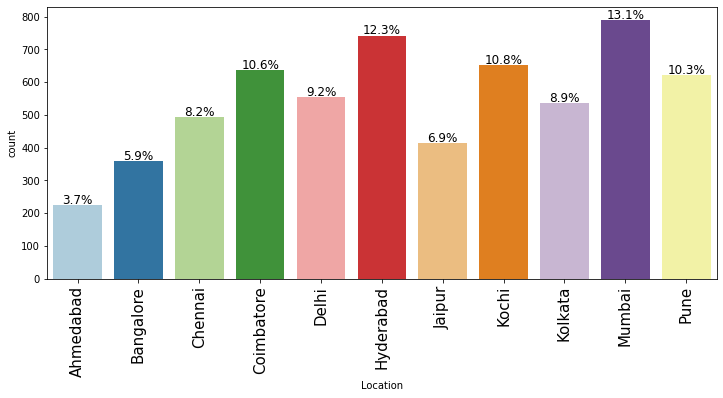

In [41]:
#Let's visualize it
labeled_barplot(data, "Location", perc=True)

Mumbai and Hyderabad are the Locations with the most available cars, while Ahmedabad is the least one.

In [42]:
#Groupping data by Location to get the price range
data.groupby("Location").Price.mean().sort_values(ascending=False)

Location
Coimbatore    15.078223
Bangalore     13.328631
Kochi         11.179186
Hyderabad      9.776550
Delhi          9.707726
Mumbai         9.429329
Ahmedabad      8.457321
Chennai        7.753623
Pune           6.726254
Jaipur         5.809225
Kolkata        5.661215
Name: Price, dtype: float64

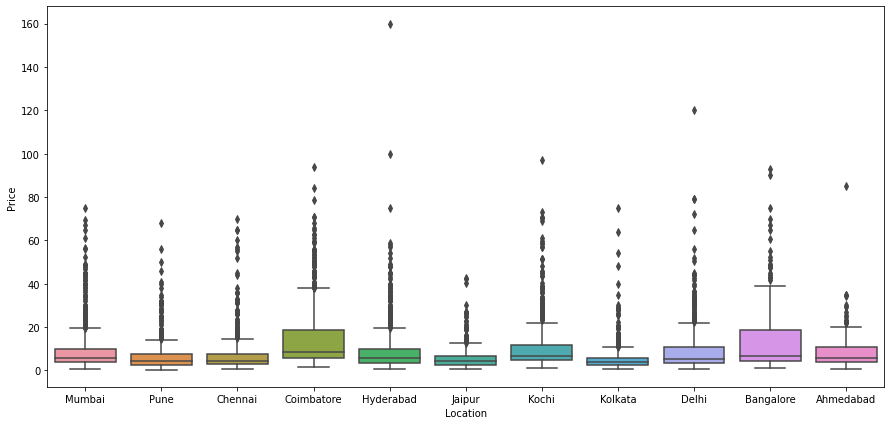

In [43]:
#Let's visualize that!
plt.figure(figsize=(15, 7))
sns.boxplot(x='Location', y='Price', data=data);
plt.show()

Coimbatore and Bangalore are the cities with the most expensive car prices.
Chennai, Jaipur and Kolkata are the cities with the least expensive cars.

In [44]:
#Get the Price per Owner_Type in average
data.groupby("Owner_Type").Price.mean().sort_values(ascending=False)

Owner_Type
First             9.962445
Second            7.599886
Third             5.007257
Fourth & Above    3.280000
Name: Price, dtype: float64

A Single Owner type car is with higher price.

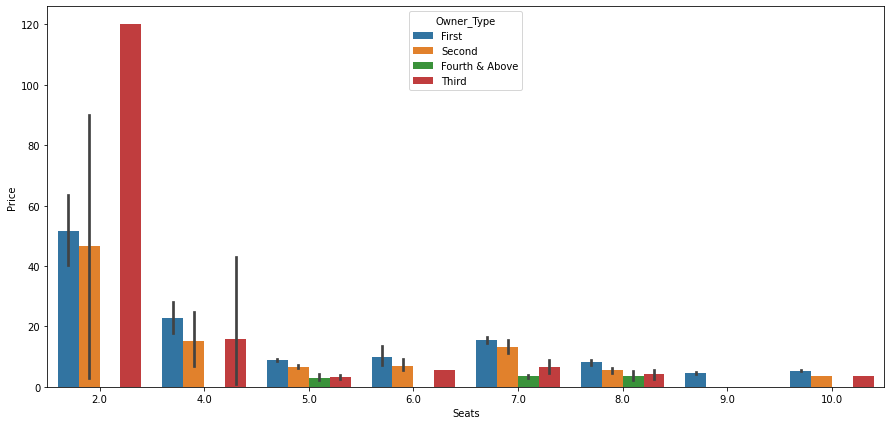

In [45]:
#Using barpolot to visualize Seats against Price
plt.figure(figsize=(15, 7))
sns.barplot(x='Seats', y='Price', data=data, hue='Owner_Type');
plt.show()

* 2 seat cars are the most expensive cars, especially for car with three previous owners.
* In overall dataset, a single owner cars are the most expensive cars with seats >= 4
* 10 seat cars are the least expensive ones.
* There are not too many options of cars with four or more owners.

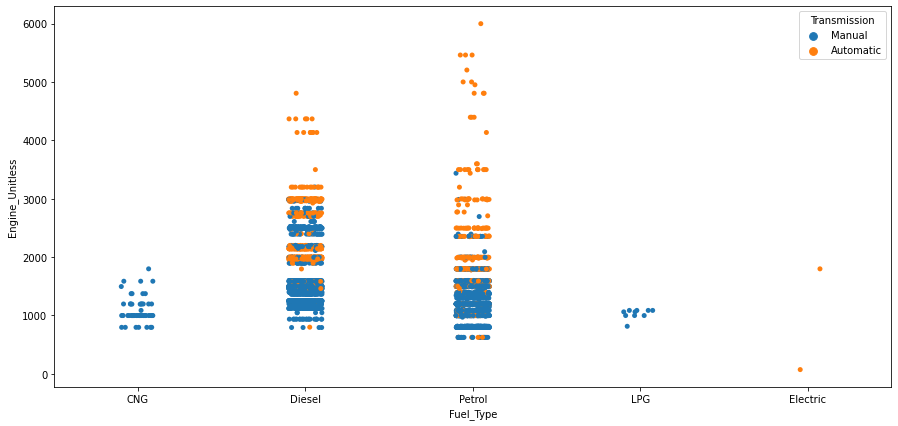

In [46]:
plt.figure(figsize=(15, 7))
sns.stripplot(y='Engine_Unitless', x='Fuel_Type', data=data , hue='Transmission', jitter=True);
plt.show()

* CNG and LPG fuel_types are only used on Manual Transmission cars and Engine volume is pretty low in comparison to other fuel_types
* Electric fuel_type is only for Automaitc Transmission
* Diesel fuel_type for Automatic transmission contains larger engine volume than on Manual
* Petrol has the biggest engine volume size for Automatic cars

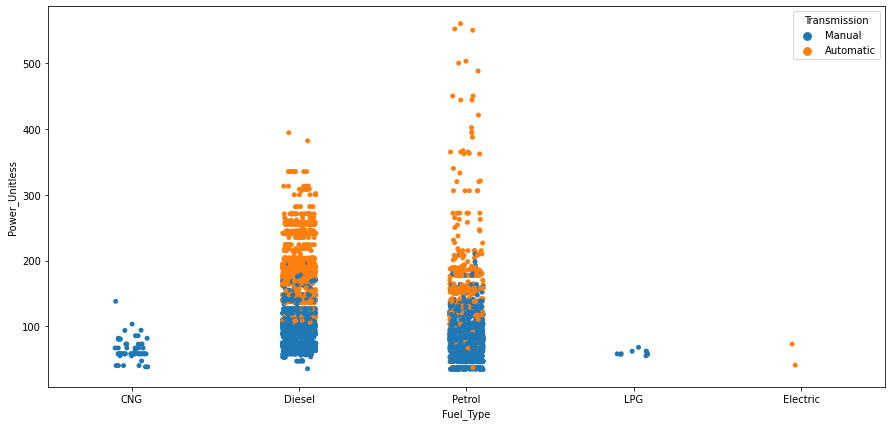

In [47]:
plt.figure(figsize=(15, 7))
sns.stripplot(y='Power_Unitless', x='Fuel_Type', data=data , hue='Transmission', jitter=True);
plt.show()

* The Power is the least for LPG and Electric cars
* CNG has a wide range than the minimum
* Diesel and Petrol are pretty similar on Manual cars, but Petrol power is higher and contains Outliers on Automatic 

In [48]:
# Get offered Mileage based on fueltype
data.groupby("Fuel_Type")['Mileage_Unitless'].mean().sort_values()

Fuel_Type
Petrol      17.415204
Electric    18.141580
Diesel      18.620484
LPG         19.385000
CNG         25.418036
Name: Mileage_Unitless, dtype: float64

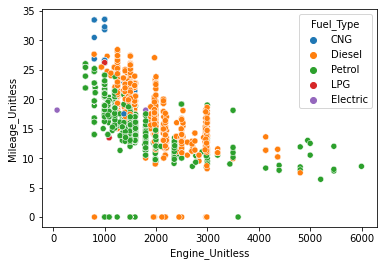

In [49]:
#Let's visualize that!
sns.scatterplot(x='Engine_Unitless', y='Mileage_Unitless', data=data, hue='Fuel_Type');
plt.show()

Engine volume and Mileage are somewhat negatively related:

* CNG offers the highest Mileage with a small engine
* Electric car has small engine and offer a mean Mileage
* Petrol and Diesel types are presented with high mileage and smaller Engine

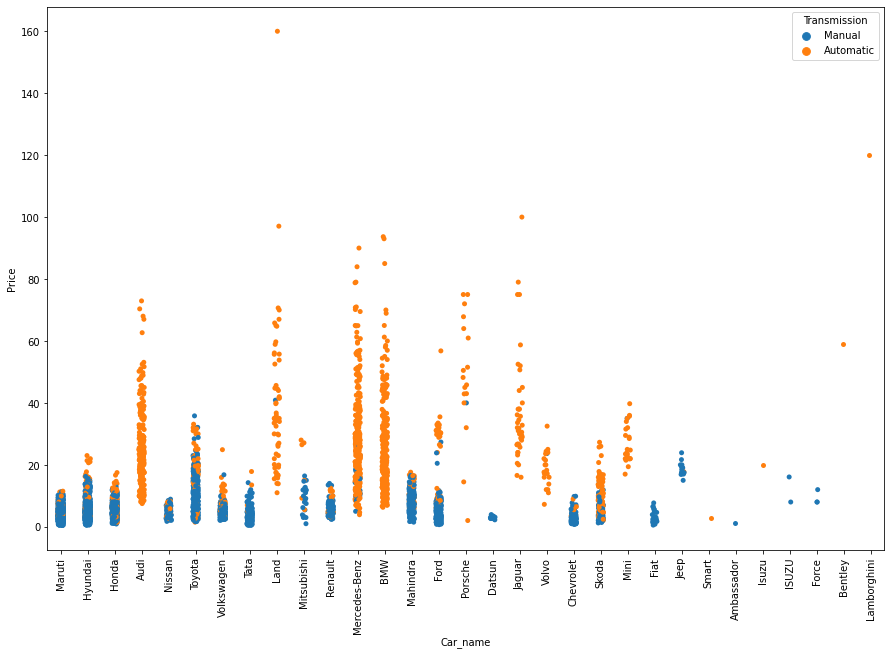

In [50]:
#Let's extract car company names 
data['Car_name'] = data['Name'].str.split(" ").str[0]

#Vizualize car names impacting the price
plt.figure(figsize=(15,10))
sns.stripplot(x=data.Car_name, y=data.Price, hue=data.Transmission, jitter=True);
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

The most worldwide luxury cars have the highest price which is expected => Audi, Mercedes, BMW, Land, Jaguar.

Dutson, Flat, Jeep, Ambassador, ISUZU, Force cars only offer a manual transmission.

Audi, BMW, Jaguar, Volvo Smart, Isuzu, Bently cars only offer Automatic transmission.

Manual cars are cheaper

# Massaging Categorical data

## Transmission 

In [51]:
data['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [52]:
#Create dummy dataframe for Transmission values
transmission_dummies = pd.get_dummies(data=data['Transmission'], columns=['Auto', 'Manual'], drop_first=True)
transmission_dummies.head()

,Manual
0,1
1,1
2,1
3,1
4,0


In [53]:
#Merge the dummies df with our data df
data = pd.concat([data, transmission_dummies], axis='columns')
#And drop the original Transmission column
data.drop("Transmission", axis=1, inplace=True)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Seats,New_Price,Price,Mileage_Unitless,Engine_Unitless,Power_Unitless,Car_name,Manual
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,First,5.0,5.51,1.75,26.60,998.0,58.16,Maruti,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,First,5.0,16.06,12.50,19.67,1582.0,126.20,Hyundai,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,First,5.0,8.61,4.50,18.20,1199.0,88.70,Honda,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,First,7.0,11.27,6.00,20.77,1248.0,88.76,Maruti,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Second,5.0,53.14,17.74,15.20,1968.0,140.80,Audi,0


## Fuel_Type

In [54]:
data.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [55]:
#Create dummy dataframe for Transmission values
fuel_dummies = pd.get_dummies(data=data['Fuel_Type'], drop_first=True)
fuel_dummies.head()

,Diesel,Electric,LPG,Petrol
0,0,0,0,0
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0


In [56]:
#Merge the dummies df with our data df
data = pd.concat([data, fuel_dummies], axis='columns')
#And drop the original Fuel_Type column
data.drop("Fuel_Type", axis=1, inplace=True)
data.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Seats,New_Price,Price,Mileage_Unitless,Engine_Unitless,Power_Unitless,Car_name,Manual,Diesel,Electric,LPG,Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,First,5.0,5.51,1.75,26.60,998.0,58.16,Maruti,1,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,5.0,16.06,12.50,19.67,1582.0,126.20,Hyundai,1,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,First,5.0,8.61,4.50,18.20,1199.0,88.70,Honda,1,0,0,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,First,7.0,11.27,6.00,20.77,1248.0,88.76,Maruti,1,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,5.0,53.14,17.74,15.20,1968.0,140.80,Audi,0,1,0,0,0


## Location 

In [57]:
data.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [58]:
#Create dummy dataframe for Location values
df_loc = pd.get_dummies(data=data['Location'], drop_first=True)

#Concat the new columns with original dataframe and remove the orginal Location column
data = pd.concat([data, df_loc], axis='columns')
data.drop("Location", axis=1, inplace=True)
data.head()

,Name,Year,Kilometers_Driven,Owner_Type,Seats,New_Price,Price,Mileage_Unitless,Engine_Unitless,Power_Unitless,Car_name,Manual,Diesel,Electric,LPG,Petrol,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,Maruti Wagon R LXI CNG,2010,72000,First,5.0,5.51,1.75,26.60,998.0,58.16,Maruti,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,First,5.0,16.06,12.50,19.67,1582.0,126.20,Hyundai,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Honda Jazz V,2011,46000,First,5.0,8.61,4.50,18.20,1199.0,88.70,Honda,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,2012,87000,First,7.0,11.27,6.00,20.77,1248.0,88.76,Maruti,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Second,5.0,53.14,17.74,15.20,1968.0,140.80,Audi,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


## Owner_Type

In [59]:
data.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [60]:
#Using OneHotEncoder library
data_owner = pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(data[['Owner_Type']]), columns=['First_Owner', 'Second_Owner', 'Third_Owner', 'Fourth & Above_Owner'])
data_owner.drop("First_Owner",axis=1, inplace=True)

In [61]:
#Concat Owner and original dataframes
data = pd.concat([data, data_owner], axis='columns')

#Remove original "Owner_Type" column
data.drop("Owner_Type", axis=1, inplace=True)

### Car Name

In [62]:
# data.drop(["Name", "Car_name"], axis=1, inplace=True)
data.drop(["Name"], axis=1, inplace=True)

In [63]:
#Create dummy dataframe for Car Name values
name_dummies = pd.get_dummies(data=data['Car_name'], drop_first=True)

#Concat the new columns with original dataframe and remove the orginal Name column
data = pd.concat([data, name_dummies], axis='columns')
data.drop("Car_name", axis=1, inplace=True)
data.head()

,Year,Kilometers_Driven,Seats,New_Price,Price,Mileage_Unitless,Engine_Unitless,Power_Unitless,Manual,Diesel,Electric,LPG,Petrol,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Second_Owner,Third_Owner,Fourth & Above_Owner,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,2010,72000,5.0,5.51,1.75,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,16.06,12.50,19.67,1582.0,126.20,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,8.61,4.50,18.20,1199.0,88.70,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,11.27,6.00,20.77,1248.0,88.76,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,53.14,17.74,15.20,1968.0,140.80,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  6019 non-null   int64  
 1   Kilometers_Driven     6019 non-null   int64  
 2   Seats                 6019 non-null   float64
 3   New_Price             6019 non-null   float64
 4   Price                 6019 non-null   float64
 5   Mileage_Unitless      6019 non-null   float64
 6   Engine_Unitless       6019 non-null   float64
 7   Power_Unitless        6019 non-null   float64
 8   Manual                6019 non-null   uint8  
 9   Diesel                6019 non-null   uint8  
 10  Electric              6019 non-null   uint8  
 11  LPG                   6019 non-null   uint8  
 12  Petrol                6019 non-null   uint8  
 13  Bangalore             6019 non-null   uint8  
 14  Chennai               6019 non-null   uint8  
 15  Coimbatore           

There are 6019 rows and 56 columns

In [65]:
data.sample(5)

,Year,Kilometers_Driven,Seats,New_Price,Price,Mileage_Unitless,Engine_Unitless,Power_Unitless,Manual,Diesel,Electric,LPG,Petrol,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Second_Owner,Third_Owner,Fourth & Above_Owner,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
1818,2014,37000,5.0,7.45,3.5,18.9,1197.0,82.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
500,2011,75000,5.0,5.51,2.6,18.9,998.0,67.1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5123,2014,31200,5.0,7.45,3.9,18.9,1197.0,82.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3192,2013,30000,5.0,10.25,2.1,21.1,814.0,55.2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
535,2005,108000,5.0,7.63,1.0,17.0,1405.0,70.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Looks like we have converted all independent categorical data into numerical

# Building the Model

In [66]:
#Preparing the dependent and independent variables
X = data.drop("Price", axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [67]:
# Creating an instance of Linear Regression
model = LinearRegression()
#Training the model with train dataset
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2
        },
        index=[0],
    )

    return df_perf

In [69]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(model, X_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,5.325759,2.859746,0.778178,0.775244


In [70]:
# Checking model performance on test set
print("Testing Performance\n")
lin_reg_model_test_perf = model_performance_regression(model, X_test, y_test)
lin_reg_model_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,6.199178,2.782063,0.676392,0.666222


Based on above results model performed for 78% on train data, and pretty low ~ 67% on test data. The RMSE is higher on test 

In [71]:
#Get coefficients
coef_df = pd.DataFrame(
    np.append(model.coef_, model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,9.382041e-01
Kilometers_Driven,-2.196124e-05
Seats,-1.755989e-01
New_Price,1.550408e-01
Mileage_Unitless,-1.007569e-01
Engine_Unitless,1.060490e-03
Power_Unitless,7.078450e-02
Manual,2.706577e-01
Diesel,2.336576e-01
Electric,8.243334e+00


Year, New_Price, Engine,Power,Electric,LPG car types along with  some of the cities, 2 Owner car and 4 and above owner types are positive coefficients, so increase in these fields will increase the price.
While values with negative coefficients will decrease the value of Price => f.e. Diesel, Mileage, Seats

# Log transformation

In [72]:
data.head()

,Year,Kilometers_Driven,Seats,New_Price,Price,Mileage_Unitless,Engine_Unitless,Power_Unitless,Manual,Diesel,Electric,LPG,Petrol,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Second_Owner,Third_Owner,Fourth & Above_Owner,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,2010,72000,5.0,5.51,1.75,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,16.06,12.50,19.67,1582.0,126.20,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,8.61,4.50,18.20,1199.0,88.70,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,11.27,6.00,20.77,1248.0,88.76,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,53.14,17.74,15.20,1968.0,140.80,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Price

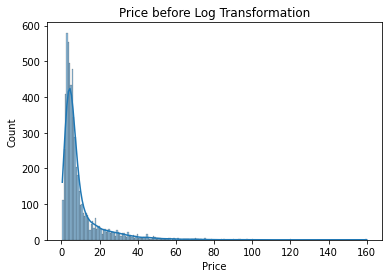

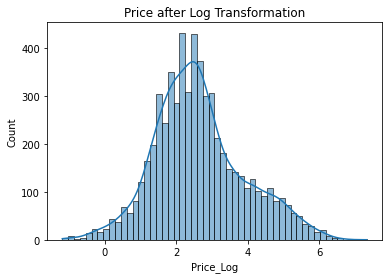

In [73]:
#Let's do Log transformation for skewed variables
data['Price_Log'] = np.log2(data['Price'])

plt.title("Price before Log Transformation")
sns.histplot(data['Price'], kde=True)
plt.show()

plt.title("Price after Log Transformation")
sns.histplot(data['Price_Log'], kde=True)
plt.show()

Price column is looking much better and have a normal distribution shape

In [74]:
#Preparing the dependent and independent variables
X = data.drop(["Price", 'Price_Log'], axis=1)
y = data['Price_Log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X.head()

,Year,Kilometers_Driven,Seats,New_Price,Mileage_Unitless,Engine_Unitless,Power_Unitless,Manual,Diesel,Electric,LPG,Petrol,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Second_Owner,Third_Owner,Fourth & Above_Owner,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,2010,72000,5.0,5.51,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,16.06,19.67,1582.0,126.20,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,8.61,18.20,1199.0,88.70,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,11.27,20.77,1248.0,88.76,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,53.14,15.20,1968.0,140.80,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
# Creating an instance of Linear Regression
model = LinearRegression()
#Training the model with train dataset
model.fit(X_train, y_train)

LinearRegression()

In [76]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(model, X_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.350726,0.259718,0.922323,0.921295


In [77]:
# Checking model performance on test set
print("Testing Performance\n")
lin_reg_model_test_perf = model_performance_regression(model, X_test, y_test)
lin_reg_model_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.400363,0.257021,0.899989,0.896845


The results are looking much better with Standardized values of Price

### New_Price

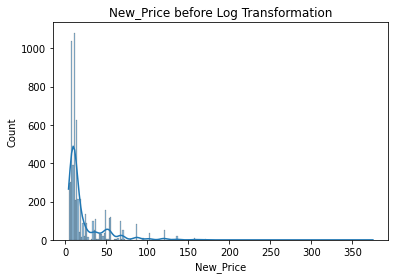

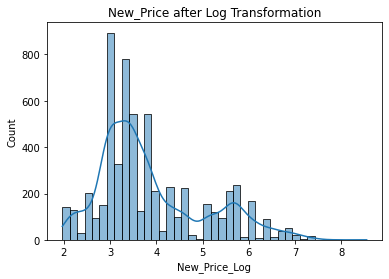

In [78]:
#Let's do Log transformation for skewed variables
data['New_Price_Log'] = np.log2(data['New_Price'])

plt.title("New_Price before Log Transformation")
sns.histplot(data['New_Price'], kde=True)
plt.show()

plt.title("New_Price after Log Transformation")
sns.histplot(data['New_Price_Log'], kde=True)
plt.show()

In [79]:
#Preparing the dependent and independent variables
X = data.drop(["Price", 'Price_Log', 'New_Price'], axis=1)
y = data['Price_Log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X.head()

,Year,Kilometers_Driven,Seats,Mileage_Unitless,Engine_Unitless,Power_Unitless,Manual,Diesel,Electric,LPG,Petrol,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Second_Owner,Third_Owner,Fourth & Above_Owner,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,New_Price_Log
0,2010,72000,5.0,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.462052
1,2015,41000,5.0,19.67,1582.0,126.20,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.005400
2,2011,46000,5.0,18.20,1199.0,88.70,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.106013
3,2012,87000,7.0,20.77,1248.0,88.76,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.494416
4,2013,40670,5.0,15.20,1968.0,140.80,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.731726


In [80]:
# Creating an instance of Linear Regression
model = LinearRegression()
#Training the model with train dataset
model.fit(X_train, y_train)

LinearRegression()

In [81]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(model, X_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.324008,0.232139,0.933707,0.93283


In [82]:
# Checking model performance on test set
print("Testing Performance\n")
lin_reg_model_test_perf = model_performance_regression(model, X_test, y_test)
lin_reg_model_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.388616,0.23031,0.905771,0.90281


The result are a little better with transforming an independent variable New_Price, to keep it consistent with the Price column

# Model Evaluation

In [83]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=X_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    6.7s finished

[2022-03-03 21:51:10] Features: 1/55 -- score: 0.6010780499452181[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.2s finished

[2022-03-03 21:51:10] Features: 2/55 -- score: 0.8568391160172494[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  53 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.2s finished

[2022-03-03 21:51:10] Features: 3/55 -- score: 0.8848827535001543[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.2s finished

[2022-03-03 21:51:11] Features: 4/55 -- score: 0.8919709854321466[Para

[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.6s finished

[2022-03-03 21:51:24] Features: 33/55 -- score: 0.9295336130586236[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.5s finished

[2022-03-03 21:51:24] Features: 34/55 -- score: 0.9296381742024794[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.5s finished

[2022-03-03 21:51:25] Features: 35/55 -- score: 0.9296945275111927[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 ou

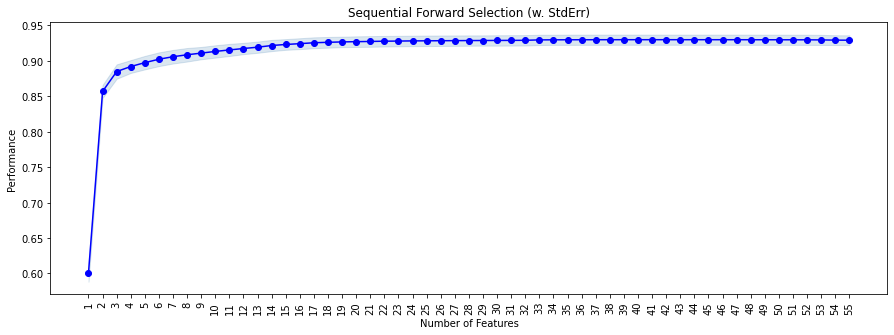

In [84]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

* Perfomance of the model increasing up until 14th feature , then it's pretty constant.
* With 14 features we reached ~ 0.92 of adjusted R2
* With 17 features it's ~ 0.93 
* With 55 ftures it's ~ 0.93

In [85]:
reg = LinearRegression()

# Build step forward feature selection with only 9 features
sfs = SFS(
    reg,
    k_features=14,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.3s finished

[2022-03-03 21:54:09] Features: 1/14 -- score: 0.6010780499452181[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.2s finished

[2022-03-03 21:54:09] Features: 2/14 -- score: 0.8568391160172494[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  53 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.2s finished

[2022-03-03 21:54:09] Features: 3/14 -- score: 0.8848827535001543[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.2s finished

[2022-03-03 21:54:09] Features: 4/14 -- score: 0.89

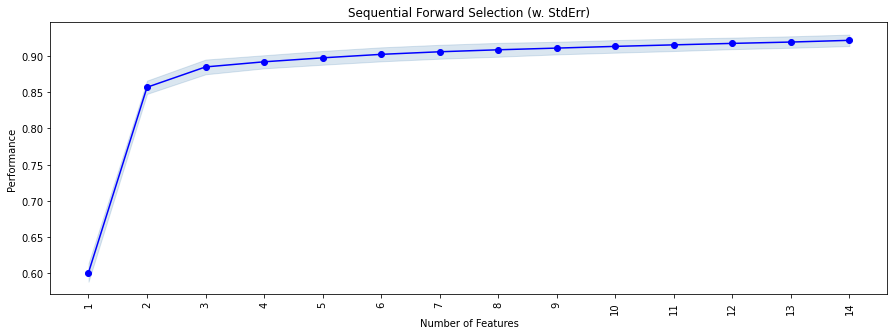

In [86]:
#Let's plot the sfs results
fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

In [87]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 3, 5, 6, 10, 11, 13, 15, 18, 27, 41, 48, 50, 54]


In [88]:
# let us look at the names of the important features
X_train.columns[feat_cols]

Index(['Year', 'Mileage_Unitless', 'Power_Unitless', 'Manual', 'Petrol',
       'Bangalore', 'Coimbatore', 'Hyderabad', 'Kolkata', 'Chevrolet',
       'Maruti', 'Skoda', 'Tata', 'New_Price_Log'],
      dtype='object')

In [89]:
X_train_final = X_train[X_train.columns[feat_cols]]

In [90]:
# Creating new x_test with the same 9 variables that we selected for X_train
X_test_final = X_test[X_train_final.columns]

In [91]:
# Fitting linear model
model2 = LinearRegression()
model2.fit(X_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(model2.coef_.flatten(), model2.intercept_),
    index=X_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
print(coef_df)

                  Coefficients
Year                  0.187710
Mileage_Unitless     -0.019928
Power_Unitless        0.006320
Manual               -0.187026
Petrol               -0.298097
Bangalore             0.285404
Coimbatore            0.190581
Hyderabad             0.240563
Kolkata              -0.209208
Chevrolet            -0.457676
Maruti                0.180805
Skoda                -0.318868
Tata                 -0.527776
New_Price_Log         0.478534
Intercept          -377.284241


* Year, Power, New_Price and cities with higher price(Hyderabad,Bangalore,Coimbatore), expensive car brands(Maruti) has positive coefficients, which cause the increase in Price - target variable. 
* Mileage, Manual Transmission, Petrol fuel_type, city Kolkata  with the lowest pric, and cheap car brands (Skoda, Chevi, Tata) cause decrease in  Price.

In [92]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    model2, X_train_final, y_train
)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.349113,0.248452,0.923036,0.922779


In [93]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    model2, X_test_final, y_test
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.321069,0.239479,0.935681,0.935178


Test performance with adjusted features looks a bit better, Root Mean Squared Error is smaller on test data. So we will stick to this model

## VIF 

In [94]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_test_final.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_test_final.values, i)
                          for i in range(len(X_test_final.columns))]
  
vif_data

,feature,VIF
0,Year,127.911253
1,Mileage_Unitless,29.353077
2,Power_Unitless,24.849605
3,Manual,6.785511
4,Petrol,2.846740
5,Bangalore,1.124030
6,Coimbatore,1.188991
7,Hyderabad,1.203356
8,Kolkata,1.180285
9,Chevrolet,1.039635


* Year, New_Price columns have the highest score, which makes sense as newer the car higher the price.
* Bigger the Engine volume the higher the price
* Higher the Mileage capacity higher the price
* Cities doesn't really have much of an impact on a Price

# Conclusion:

* With above Linear model we achieved R2 = 0.935 on test set, which company can use to predict the prices for Used cars
* The model contains 0.24 Mean error which company can keep in mind on predicting the prices.
* We figured Year of the car, Power, Automatic Transmission, City the car is being selled from, the Price for the new version of the car has a direct positive impact on prediction of the Prices.
* Also Manual Transmission, Petrol fuel_type, cities with cheaper prices on a car, along with cheaper brands affect the prices on negative way.
* We improved our model by applying Log transformation into target variable, as a result shaping it closer to normal distribution. 
* Numbers between train and test datasets are comparable, meaning there is no sign of Overfitting.